<a href="https://colab.research.google.com/github/asdswsxs/colab/blob/main/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#import scipy
import os
import glob
import xlrd
from pathlib import Path
import codecs

In [ ]:
BASE_DIR = Path(os.getcwd()).resolve().parent # Scriptフォルダの１つ上のディレクトリ
IN_DIR = str(BASE_DIR) + '/input/work/'  # 入力データ
MST_DIR = str(IN_DIR) + 'マスタ/'  # マスタデータ
TEMP_DIR = str(BASE_DIR) + '/temp/'            # 中間生成物の保存先
OUT_DIR = str(BASE_DIR) + '/out/'          # 生成物の保存先

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

In [ ]:
%%time 
train_data = pd.read_csv(OUT_DIR + "model_data_train.csv",encoding="utf-8-sig")
test_data = pd.read_csv(OUT_DIR + "model_data_test.csv",encoding="utf-8-sig")
test = test_data.drop(columns="target")

CPU times: user 34.1 s, sys: 8.53 s, total: 42.6 s
Wall time: 47.7 s


In [ ]:
# Logistic Regression
def pred_Logistic(X_train, Y_train, test): 
    from sklearn.linear_model import LogisticRegression

    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)
    Y_pred = logreg.predict(test)
    acc = round(logreg.score(X_train, Y_train) * 100, 2)

    #print(acc_log)

    return Y_pred, acc       
    

In [ ]:
# Support Vector Machines
def pred_KNeighbors(X_train, Y_train, test):  
    from sklearn.svm import SVC

    svc = SVC()
    svc.fit(X_train, Y_train)

    #acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
    acc = round(svc.score(X_train, Y_train) * 100, 2)

    #print(acc)
    
    Y_pred = svc.predict(test)
    
    return Y_pred, acc    
    

In [ ]:
# K-近傍法
def pred_KNeighbors(X_train, Y_train, test):  
    from sklearn.neighbors import KNeighborsClassifier

    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, Y_train)
    #acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
    acc = round(knn.score(X_train, Y_train) * 100, 2)

    #print(acc)
    
    Y_pred = knn.predict(test)
    
    return Y_pred, acc


In [ ]:
# Gaussian Naive Bayes
def pred_GaussianNB(X_train, Y_train, test):  
    from sklearn.naive_bayes import GaussianNB

    gaussian = GaussianNB()
    gaussian.fit(X_train, Y_train)
    #acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
    acc = round(gaussian.score(X_train, Y_train) * 100, 2)

    Y_pred = gaussian.predict(test)
    
    #print(acc)
    
    return Y_pred, acc    


In [ ]:
# Perceptron
def pred_Perceptron(X_train, Y_train, test):  
    from sklearn.linear_model import Perceptron

    perceptron = Perceptron()
    perceptron.fit(X_train, Y_train)
    #acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
    acc = round(perceptron.score(X_train, Y_train) * 100, 2)

    #print(acc)
    Y_pred = perceptron.predict(test)

    return Y_pred, acc


In [ ]:
# Linear SVC
def pred_LinearSVC(X_train, Y_train, test):  
    from sklearn.svm import LinearSVC

    linear_svc = LinearSVC()
    linear_svc.fit(X_train, Y_train)
    #acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
    acc = round(linear_svc.score(X_train, Y_train) * 100, 2)
    
    #print(acc)
    
    Y_pred = linear_svc.predict(test)
    
    return Y_pred, acc


In [ ]:
# Stochastic Gradient Descent
def pred_SGD(X_train, Y_train, test):  
    from sklearn.linear_model import SGDClassifier

    sgd = SGDClassifier()
    sgd.fit(X_train, Y_train)

    #acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
    acc = round(sgd.score(X_train, Y_train) * 100, 2)
    #print(acc)

    Y_pred = sgd.predict(test)

    return Y_pred, acc
    

In [ ]:
# Decision Tree
def pred_Decision_Tree(X_train, Y_train, test):  
    from sklearn.tree import DecisionTreeClassifier

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    #acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
    acc = round(decision_tree.score(X_train, Y_train) * 100, 2)
    #print(acc)

    Y_pred = decision_tree.predict(test)

    return Y_pred, acc


In [ ]:
# Random Forest
def pred_RandomForest(X_train, Y_train, test):
    from sklearn.ensemble import RandomForestClassifier

    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train, Y_train)
    random_forest.score(X_train, Y_train)
    acc = round(random_forest.score(X_train, Y_train) * 100, 2)

    #print(acc_random_forest)

    
    Y_pred = random_forest.predict(test)    
    return Y_pred, acc    


In [ ]:
def pred_xgb(X_train, Y_train, test):    
    
    from xgboost import XGBClassifier

    classifier = XGBClassifier()
    classifier.fit(X_train, Y_train)
    classifier.score(X_train, Y_train)

    #acc_xgblassifier = round(classifier.score(X_train, Y_train) * 100, 2)
    acc = round(classifier.score(X_train, Y_train) * 100, 2)
    #print(acc)
    
    Y_pred = classifier.predict(test)

    return Y_pred, acc


In [ ]:
sum_score = np.zeros(len(X_cols ),)
 
for i in range(splits):
    sum_score += score["estimator"][i].feature_importances()
 
df_score = pd.DataFrame(sum_score/splits,index=X_cols,columns=["score"])
 
df_score.sort_values("score",ascending=False) #影響が大きい順に表示

In [ ]:
def pred_grid_cv_xgb(X_train, Y_train, test):    
    from xgboost import XGBClassifier
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import confusion_matrix, classification_report

    # xgboostモデルの作成
    clf = XGBClassifier()

    # ハイパーパラメータ探索
    clf_cv = GridSearchCV(clf, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
    clf_cv.fit(X_train, Y_train)
    print(clf_cv.best_params_, clf_cv.best_score_)

    # 改めて最適パラメータで学習
    clf = XGBClassifier(**clf_cv.best_params_)
    clf.fit(X_train, Y_train)

    acc = round(clf.score(X_train, Y_train) * 100, 2)
    # 学習モデルの保存、読み込み
    # import pickle
    # pickle.dump(clf, open("model.pkl", "wb"))
    # clf = pickle.load(open("model.pkl", "rb"))

    # 学習モデルの評価
    Y_pred = clf.predict(test)

    return Y_pred, acc


In [ ]:

col_list,col_list2 = chk_col(train_data, test)
print(len(col_list))
print(col_list)

61
['sex_flg', 'walkbus_flg', 'expcomp_num', 'wishannualincm_num', 'minwishannualincm_num', 'check_flg', 'current_annualincome_num', 'monthly_annualincome_num', 'year_bonus', 'allowance_num_1', 'allowance_num_2', 'allowance_num_3', 'allowance_num_4', 'mypage_flg', 'currentsalary_num', 'wishsalary_num', 'minwishsalary_num', 'disabilities_flg', 'emply_num', 'minannualincm', 'maxannualincm', 'modelage', 'minage', 'maxage', 'age_flg', 'careerchange_num', 'oreder_focus_flg', 'overtime_flg', 'minbasepay', 'maxbasepay', 'payrise_flg', 'fixedovertimefee_flg', 'salesamount', 'ordinaryprofit', 'client_employee_num', 'client_frigncptl_flg', 'venture_flg', 'client_focus_flg', 'retirementage_num', 'is_march_flg', 'busicr_frigncptl_flg', 'busicr_employee_num', 'busicr_capital', 'annualincm', 'toeic', 'toefl', 'doc_reading_flg', 'to_exchange_email_flg', 'tel_conversation_flg', 'conference_in_eng_flg', 'busi_talk_and_nego_in_eng_flg', 'stay_abroad_flg', 'prog_age', 'match_age', 'match_annualincome', '

In [ ]:
for col in test.columns.to_list():
    if "match" in col:
        print(col, train_data[col].dtype)

match_age int64
match_annualincome int64
match_salary int64
match_pref int64
match_wkarea int64
match_ocupctg1 int64
match_ocupctg2 int64
match_ocupctg3 int64


In [ ]:
print(len(test.columns.to_list()))
print(len(train_data.columns.to_list()))

52
179


In [ ]:
def chk_col(df1, df2):
    col_list = []
    for col in df1.columns.to_list():
        if col in df2.columns.to_list():
            if (df1[col].dtype in ['int64', 'float64']) and ("Id" not in col) and ("id" not in col) :
                col_list.append(col)
    col_list2 = col_list + ['target']
    
    return col_list, col_list2


In [ ]:
%%time
from sklearn.model_selection import train_test_split

col_list,col_list2 = chk_col(train_data, test)

# 不要カラム削除
X_train = train_data[col_list2].drop('target', axis=1).fillna(0)
Y_train = train_data[col_list2]['target'].fillna(0)

test = test[col_list].fillna(0)

# 訓練データとテストデータに分割する
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

# Logistic Regression
pred_logreg, acc_logreg  = pred_Logistic(X_train, Y_train, test) 

# Support Vector Machines
pred_svm, acc_svm = pred_KNeighbors(X_train, Y_train, test)

# K-近傍法
pred_knn, acc_knn = pred_KNeighbors(X_train, Y_train, test)

# Gaussian Naive Bayes
pred_gaussian, acc_gaussian = pred_GaussianNB(X_train, Y_train, test)

# Perceptron
pred_perceptron, acc_perceptron = pred_Perceptron(X_train, Y_train, test)

# Linear SVC
pred_linear_svc, acc_linear_svc = pred_LinearSVC(X_train, Y_train, test)

# Stochastic Gradient Descent
pred_sgd, acc_sgd = pred_SGD(X_train, Y_train, test)

# Decision Tree
pred_decision_tree, acc_decision_tree = pred_Decision_Tree(X_train, Y_train, test)

# Random Forest
pred_random_forest, acc_random_forest = pred_RandomForest(X_train, Y_train, test)

#XGBClassifier
#pred_xgb, acc_xgb1 =  pred_xgb(X_train, Y_train, test)
#pred_xgb_grid, acc_xgb2 =  pred_grid_cv_xgb(X_train, Y_train, test)


/Users/s1190852/.local/share/virtualenvs/Referral_business-mE8dB_a_/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


CPU times: user 13min 43s, sys: 13.4 s, total: 13min 57s
Wall time: 30min 33s


In [ ]:
# ふるふる
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'XGBClassifier', 'XGBClassifier_grid_cv'],
    'Score': [acc_svm, acc_knn, acc_logreg, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_xgb1, acc_xgb2 ]})
models.sort_values(by='Score', ascending=False)

NameError: name 'acc_xgb2' is not defined

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree',],
    'Score': [acc_svm, acc_knn, acc_logreg, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.71
8,Decision Tree,99.71
0,Support Vector Machines,79.71
1,KNN,79.71
2,Logistic Regression,55.68
4,Naive Bayes,55.68
6,Stochastic Gradient Decent,53.90
5,Perceptron,53.65
7,Linear SVC,49.99


In [ ]:
"""
"Survived": pred_logreg, 
"Survived": pred_svm, 
"Survived": pred_knn, 
"Survived": pred_gaussian, 
"Survived": pred_perceptron, 
"Survived": pred_linear_svc, 
"Survived": pred_sgd, 
"Survived": pred_decision_tree, 
"Survived": pred_random_forest, 
"Survived": pred_xgb, 
"Survived": pred_xgb_grid,
"""

submission = pd.DataFrame({
        "progress_id": test_data["progress_id"],
        "Pred_flg": pred_decision_tree,
    })

chk  = test_data.merge(submission, on = "progress_id", how="left")

chk["tp"] = [1 if (i==1) and (j==1) and (i==j) else 0 for i,j in zip(chk["Pred_flg"], chk["target"])]
chk["fp"] = [1 if (i==1) and (j==0) else 0 for i,j in zip(chk["Pred_flg"], chk["target"])]
#print("通過一致率",len(chk[chk["pred_target1"]==1])/len(chk[chk["target"]==1]))

chk["tn"] = [1 if (i==0) and (j==0) and (i==j) else 0 for i,j in zip(chk["Pred_flg"], chk["target"])]
chk["fn"] = [1 if (i==0) and (j==1) else 0 for i,j in zip(chk["Pred_flg"], chk["target"])]
#print("非通過一致率",len(chk[chk["pred_target0"]==1])/len(chk[chk["target"]==0]))


print("accuracy: " , (len(chk[chk["tp"]==1])+len(chk[chk["tn"]==1])) / len(chk)) # 予測一致数 / 全数
print("recall: " ,len(chk[chk["tp"]==1]) / (len(chk[chk["tp"]==1]) + len(chk[chk["fn"]==1]))) # 予測通過数 / 予測通過数 + 予測非通過の内通過した
print("precision: " ,len(chk[chk["tp"]==1]) / (len(chk[chk["tp"]==1]) + len(chk[chk["fp"]==1]))) # 予測通過数 / 予測通過数 + 予測通過数の内、非通過

#submission.to_csv('submission_logistic.csv', index=False)


accuracy:  0.6293460426595828
recall:  0.6135451350960083
precision:  0.5004240062688522


In [ ]:
import subprocess
from sklearn.tree import DecisionTreeClassifier, export_graphviz


def main():
    dtc = DecisionTreeClassifier(max_depth=3)
    dtc.fit(X_train, Y_train)
    export_graphviz(dtc, "tree.dot",
                    feature_names=X_train.columns.to_list(),
                    class_names=["1","0"])
    subprocess.run("dot -Tpng tree.dot -o tree.png".split())

if __name__ == "__main__":
    main()


In [ ]:


from sklearn.model_selection import train_test_split

col_list,col_list2 = chk_col(train_data, test)

# 不要カラム削除
X_train = train_data[col_list2].drop('target', axis=1).fillna(0)
Y_train = train_data[col_list2]['target'].fillna(0)

test = test[col_list].fillna(0)



In [ ]:
import pickle

with open('col_list2.pickle', 'wb') as f:
    pickle.dump(col_list2, f)

In [ ]:
def create_model_logistick(train, test):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    
    # 不要カラム削除
    X = train.drop('target', axis=1).fillna(0)
    Y = train['target']


    # 学習データ分割
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

    clf = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
    clf.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

    clf_pred = clf.predict(test)
    
    #評価の実行（正答率）
    print(round(clf.score(X_test,Y_test),3))

    coeff_df = pd.DataFrame([X.columns, clf.coef_[0]]).T
    coeff_df.columns = ["col_name","係数"]
    coeff_df["abs"] = [abs(i) for i in coeff_df["係数"]]
    coeff_df = coeff_df.sort_values("abs", ascending=False).drop("abs",axis=1)

    predict_y = clf.predict(X_test)
    predict = clf.predict_proba(X_test)[:,1]

    # FPR, TPR(, しきい値) を算出 roc_curve(test_y(0,1), predict_y(0.5,0.8,1.0....))
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, predict_y)

    # AUC
    auc = metrics.auc(fpr, tpr)

    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)    
    #plt.savefig(str(OUT_DIR) + "/"+ 'sklearn_roc_curve_' + "書類選考" + '.png')
    
    
    print("正答率:", round(metrics.accuracy_score(Y_test, predict_y),3)) # TP + TN / (TP + TN + FP + FN) 
    print("適合率:", round(metrics.precision_score(Y_test, predict_y),3))# TP  / (TP + FP) 偽陽性を避けたい（抑えたい）場合の指標
    print("再現率:", round(metrics.recall_score(Y_test, predict_y),3))   # TP  / (TP + FN) 偽陰性を避けたい（抑えたい）場合の指標
    print("F値  :", round(metrics.f1_score(Y_test, predict_y),3))       # 2 * TP  / (2*TP + FP + FN )
    
    
    # 係数確認
    print(coeff_df)
    
    return clf_pred

0.557
正答率: 0.557
適合率: 0.0
再現率: 0.0
F値  : 0.0
                         col_name           係数
42                 busicr_capital -2.32841e-13
34            client_employee_num -3.43192e-17
43                     annualincm -8.71443e-18
41            busicr_employee_num -4.47962e-18
20                  maxannualincm -2.83174e-18
19                  minannualincm -1.59996e-18
6        current_annualincome_num -1.09088e-18
14              currentsalary_num  -8.5074e-19
15                 wishsalary_num -8.39883e-19
16              minwishsalary_num -7.15939e-19
3              wishannualincm_num -4.76804e-19
4           minwishannualincm_num -4.51808e-19
44                          toeic -2.52496e-19
52                       prog_age -1.06351e-19
23                         maxage  -6.9707e-20
22                         minage -5.58883e-20
38              retirementage_num -4.59326e-20
8                      year_bonus -4.12296e-20
29                     maxbasepay -3.19535e-20
28             

/Users/s1190852/.local/share/virtualenvs/Referral_business-mE8dB_a_/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


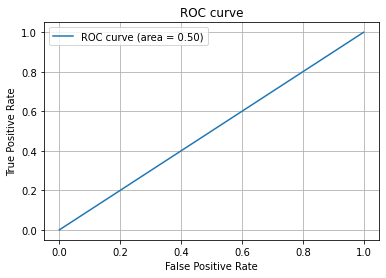

In [ ]:
tst = create_model_logistick(train_data[col_list2], test[col_list])